## Løsningsforslag seminar 2

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Henter inn data fra csv filen som ligger på canvas. Har lastet den ned i mappen `data`

In [2]:
dodsfall <- read.csv("data/dodsfall.csv")

In [3]:
dodsfall

alder,kvinner,menn
0-39,7,11
40-49,7,14
50-59,14,46
60-69,52,107
70-79,129,211
80-89,213,270
>=90,222,136


Dette kan bli litt vanskelig for R å lese inn. Det er informasjon på både rader og kolonner her, og siden jeg ønsker å bruke et diagram med stolper som er ved siden av hverandre, vil jeg gjøre om formatet til at det bare er informasjon om en stolpe per rad. Jeg bruker da funksjonen `gather`, for å gjøre dette. 

In [4]:
dodsfall_lang <- gather(dodsfall, key = "variabel", value = "verdi", -alder)

In [5]:
dodsfall_lang

alder,variabel,verdi
0-39,kvinner,7
40-49,kvinner,7
50-59,kvinner,14
60-69,kvinner,52
70-79,kvinner,129
80-89,kvinner,213
>=90,kvinner,222
0-39,menn,11
40-49,menn,14
50-59,menn,46


Lager selve plottet av data ved hjelp av ggplot funksjonen som er innebygd i tidyverse. 

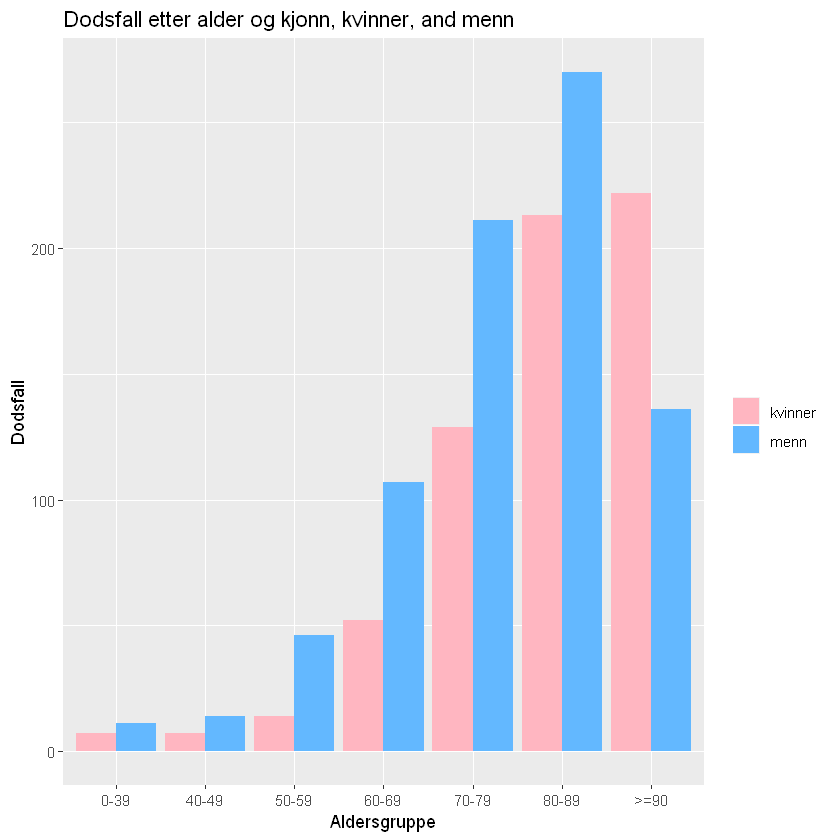

In [6]:
ggplot(dodsfall_lang, aes(x = factor(alder, level=c("0-39", "40-49", "50-59", "60-69", "70-79", "80-89", ">=90")), y = verdi, fill = variabel)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c("menn" = "steelblue1", "kvinner" = "lightpink")) +
  labs(x = "Aldersgruppe", y = "Dodsfall", fill = "") +
  ggtitle("Dodsfall etter alder og kjonn, kvinner, and menn")
